##Question 1: Use the House Prices dataset from Kaggle to build a linear regression model to predict house prices.
● Load the dataset

● Preprocess the dataset

● Build and train linear regression model

● Evaluate its performance using Mean Square Error (MSE)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

##load the Dataset

In [ ]:
# Now read the extracted CSV file
house_price = pd.read_csv('train.csv')

In [ ]:
house_price = pd.read_csv('test.csv')

In [ ]:
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
house_price.shape

(1459, 80)

##preprocess the dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Drop columns with too many missing values, if any
house_price.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [ ]:
house_price.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 76, dtype: int64

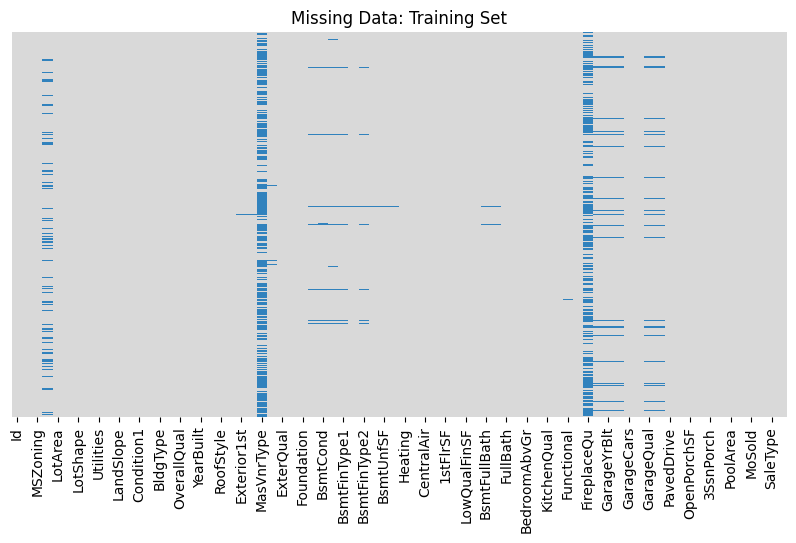

In [ ]:

# Heatmap
sns.heatmap(house_price.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [ ]:

# Separate target variable and features
X = house_price.drop('SalePrice', axis=1)
y = house_price['SalePrice']

In [ ]:

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:


# Preprocessing for categorical data: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

##Build and train linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Create the linear regression model
lin_reg_model = LinearRegression()

# Train the model
lin_reg_model.fit(X_train, y_train)

LinearRegression()

##Evaluating performance using MSE

In [ ]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_pred = lin_reg_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 886536754.6621429


##2. Use the Iris dataset from Kaggle to build a K-Nearest Neighbors (KNN) classifier to classify iris species.

● Load the dataset

● Preprocess the dataset

● Build and train KNN classifier

● Evaluate its performance using Accuracy and Confusion Matrix

##Load the data

In [ ]:
fd= pd.read_csv('/content/Iris.csv')

##Preprocess the data

In [ ]:
fd.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
fd.shape

(150, 6)

In [ ]:
#cheaking the missing values
fd.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

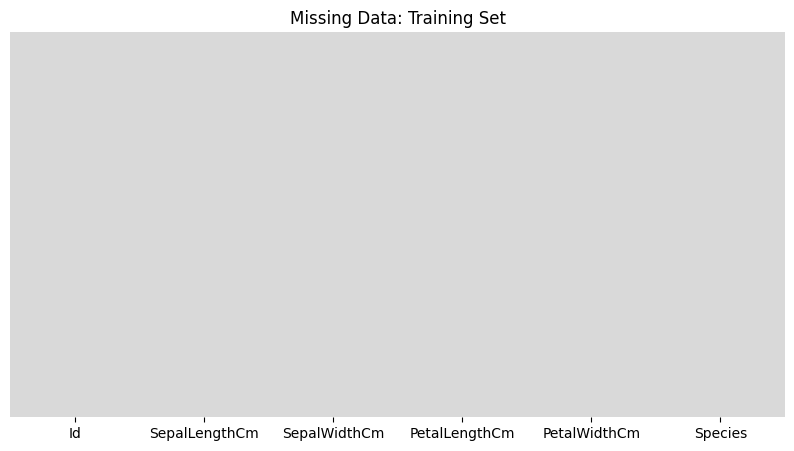

In [ ]:
# Heatmap
sns.heatmap(fd.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [ ]:
#split the dataset in training amnd testing
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = fd.drop(columns='Species')
y = fd['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

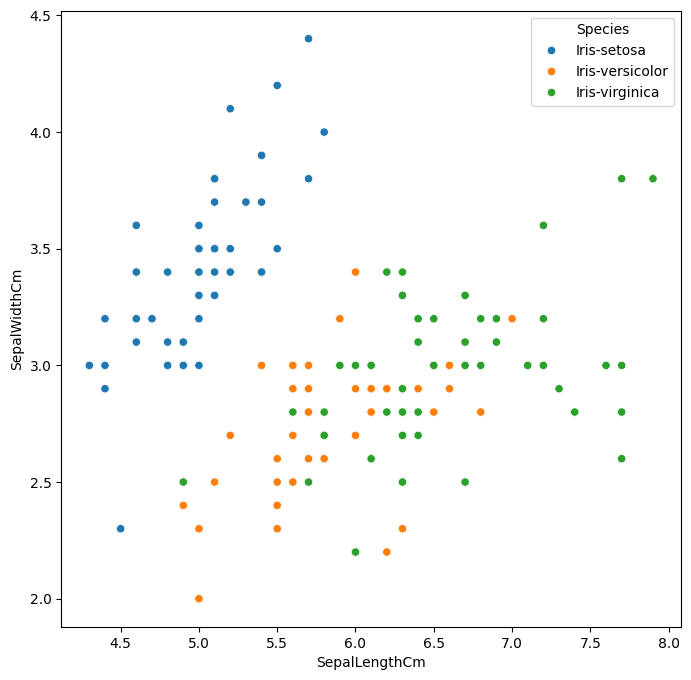

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=fd)  # Assuming 'Species' is a column in your data and you want to color by species
plt.show()

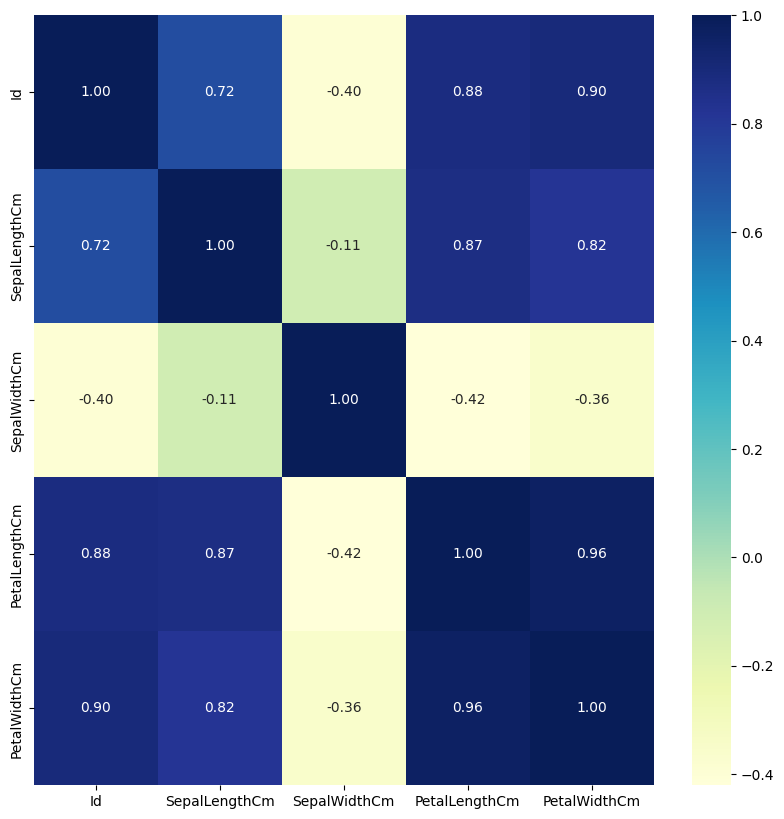

In [ ]:
plt.subplots(figsize=(10, 10))
# Calculate correlation on numerical columns only
sns.heatmap(fd.select_dtypes(include=['number']).corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

##Build and train KNN classifier



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Initialize the KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
# Train the classifier using the training set
knn.fit(X_train, y_train)
# Predict the species for the test set
y_pred = knn.predict(X_test)


##Evaluating its performance using accuracy and confusion matrix





In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


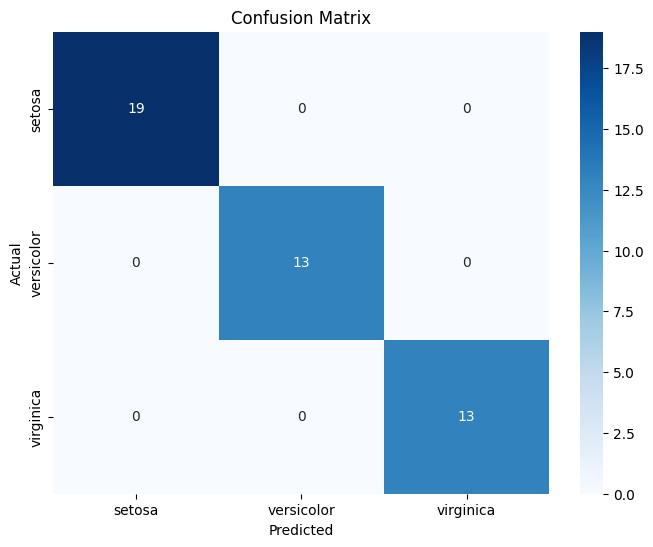

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 3: Use the Diabetes dataset from Kaggle to build a decision tree regressor to predict diabetes progression. Train the model and evaluate its performance using Mean Squared Error (MSE).

● Load the dataset

● Preprocess the dataset

● Build and train Decision Tree Regressor

● Evaluate its performance using Mean Square Error (MSE)

##load the dataset

In [ ]:
df= pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

##preprocess the dataset

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Heatmap
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [ ]:
df.describe ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Assuming the target variable is named 'target' and the rest are features
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Build and train the decision tree and regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Build and train the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

##Evaluating Performance using MSE

In [ ]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2532467532467532


##4: Use the Titanic dataset from Kaggle to build a logistic regression model to
predict whether a passenger survived or not. Train the model and evaluate its performance
 using accuracy and confusion matrix.


● Load the dataset

● Preprocess the dataset

● Build and train Logistic Regression Model

● Evaluate its performance using Accuracy and Confusion Matrix

##Load the Dataset

In [ ]:
full_data= pd.read_csv('/content/titanic_dataset.csv')

In [ ]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
full_data.shape

(891, 12)

##preprocess the dataset

In [ ]:
full_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

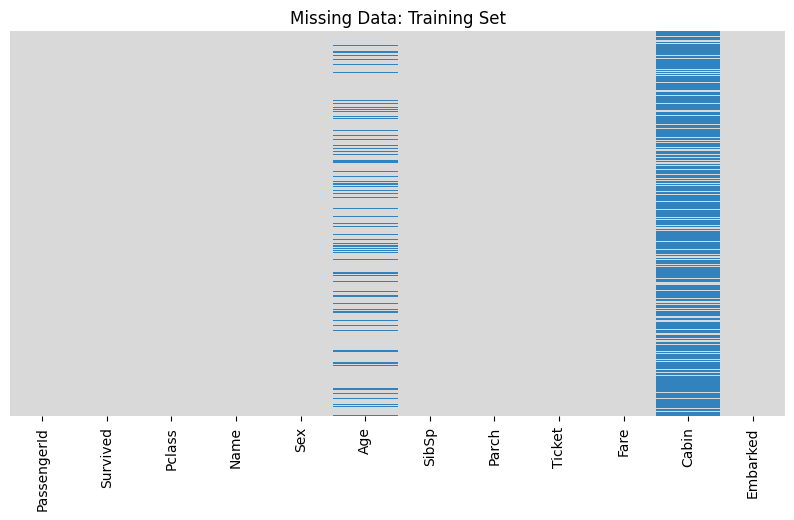

In [ ]:

# Heatmap
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [ ]:


# Fill missing values for 'Age' with the median and 'Embarked' with the mode
full_data['Age'].fillna(full_data['Age'].median(), inplace=True)
full_data['Embarked'].fillna(full_data['Embarked'].mode()[0], inplace=True)

In [ ]:

# Drop the 'Cabin' column due to too many missing values
full_data.drop(columns=['Cabin'], inplace=True)

In [ ]:

# Convert categorical variables to numerical ones
full_data= pd.get_dummies(full_data, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
features = ['Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']  # Update features to include the one-hot encoded columns
X = full_data[features]
y = full_data['Survived']

##Split the data into training and testing dataset





In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Build and train the logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Build and train the Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

##Evaluating performance using Accuracy and Confusion Matrix

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the performance using Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Evaluate the performance using Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7988826815642458
Confusion Matrix:
[[89 16]
 [20 54]]


Confusion Matrix:
 [[89 16]
 [20 54]]


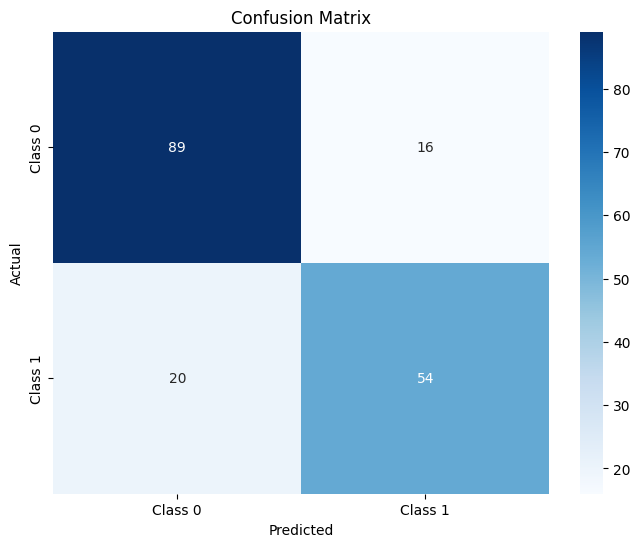

In [ ]:

from sklearn.metrics import confusion_matrix

# Assuming 'y_test' and 'y_pred' are already defined

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# **Replace 'titanic.target_names' with appropriate labels**
class_names = ['Class 0', 'Class 1']  # Example class names, replace as needed

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

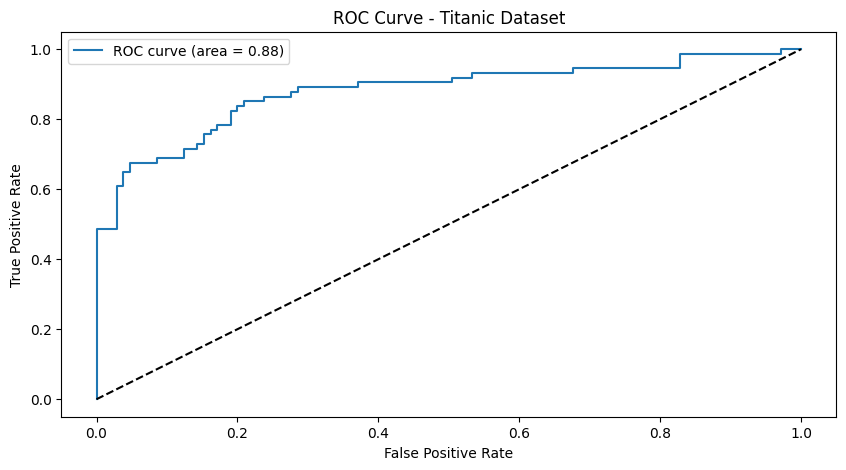

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming 'model' and 'X_test' are defined
y_pred_proba = model.predict_proba(X_test)[:, 1] # Assuming binary classification, get probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Titanic Dataset')
plt.legend()
plt.show()

##Question 5: Use "Heart Disease Dataset | Cleaned" dataset to build a classification model to predict heart disease.
Load the dataset:
Preprocess the dataset Include necessary data preprocessing steps, such as handling missing values, encoding categorical variables, and scaling features.
Identify and separate the target variable from the dataset.
The target variable indicates the presence
or absence of heart disease.
Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC  # Corrected from SVM to SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

##Load the Dataset

In [ ]:
df= pd.read_csv('/content/heart_disease_cleaned.csv')

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    bool   
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    bool   
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 102.4+ KB


In [ ]:
df.shape

(919, 16)

In [ ]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

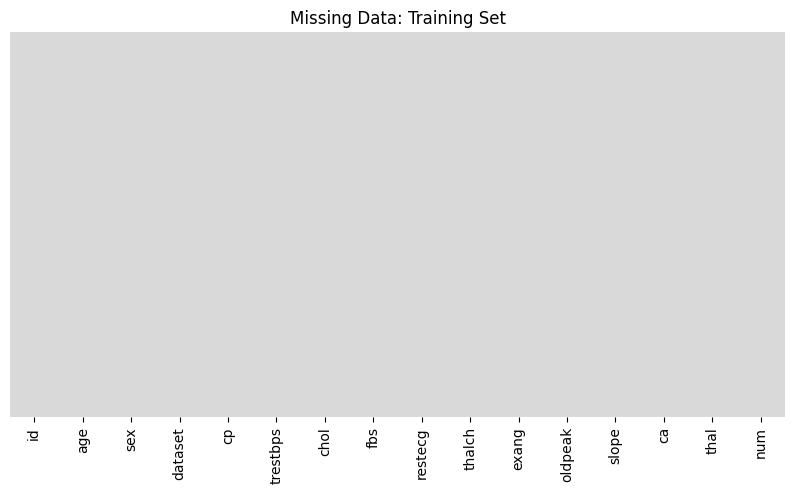

In [ ]:

# Heatmap
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,460.180631,53.509249,132.704853,200.791393,136.815734,0.973408,0.501632,0.993471
std,265.693391,9.429689,18.070335,109.213597,25.371260,1.120490,0.786423,1.141398
min,1.000000,28.000000,80.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.500000,47.000000,120.000000,178.500000,120.000000,0.000000,0.000000,0.000000
50%,460.000000,54.000000,130.000000,224.000000,138.000000,0.800000,0.000000,1.000000
75%,689.500000,60.000000,141.210000,268.000000,156.000000,1.900000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
# Convert categorical variables to numerical ones using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify features (all columns except the target)
features = df.columns[df.columns != 'target']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [ ]:
# Separate features and target variable
X = df.drop(columns=['age'])
y = df['age']

##Splitting the data in X and Y

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Output shapes of the split datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (735, 22)
Testing features shape: (184, 22)
Training labels shape: (735,)
Testing labels shape: (184,)


##Target variable

In [ ]:
X = df[['num', 'age', 'chol', 'trestbps']]
y = df['num']

##Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize a dictionary to store evaluation metrics for each algorithm
evaluation_metrics = {}

# Initialize a StandardScaler object and fit to training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train and evaluate the following algorithms:

● Logistic Regression

● Decision Tree Classifier

● Random Forest Classifier

● Gradient Boosting Classifier

● Support Vector Machine (SVM

##Logistic Regression

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
# Convert the target variable to categorical if it is continuous
y_train = y_train.astype('int').astype('category')  # Convert to int first, then to category
y_test = y_test.astype('int').astype('category')   # Convert to int first, then to category

# Now fit the model
LR_model = LogisticRegression(penalty='l1', solver='liblinear')
LR_model.fit(X_train_scaled, y_train)
LR_predictions = LR_model.predict(X_test_scaled)
LR_proba = LR_model.predict_proba(X_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np # Import numpy for mean calculation

# Logistic Regression
LR_model = LogisticRegression(penalty='l1', solver='liblinear')
LR_model.fit(X_train_scaled, y_train)
LR_predictions = LR_model.predict(X_test_scaled)
LR_proba = LR_model.predict_proba(X_test_scaled)

# Initialize a dictionary to store the Gini coefficients for each class
gini_coefficients = {}

# Calculate the Gini coefficient for each class
for class_label in range(LR_proba.shape[1]):
    class_proba = LR_proba[:, class_label]
    # Check if both classes are present for this label
    if len(np.unique((y_test == class_label).astype(int))) == 2:
        gini_coefficients[f'Class {class_label}'] = roc_auc_score((y_test == class_label).astype(int), class_proba) * 2 - 1
    else:
        print(f"Warning: Class {class_label} is not present in y_test or has only one unique value. Skipping Gini calculation.")

# Average the Gini coefficients across all classes (excluding those skipped)
if gini_coefficients:  # Check if any Gini coefficients were calculated
    average_gini_coefficient = np.mean(list(gini_coefficients.values()))
    print("Average Gini Coefficient:", average_gini_coefficient)
else:
    print("No Gini coefficients could be calculated due to single-class issues.")

Average Gini Coefficient: -0.23733895935034457


In [ ]:
# Compute other evaluation metrics
conf_matrix = confusion_matrix(y_test, LR_predictions)
accuracy = accuracy_score(y_test, LR_predictions)
precision = precision_score(y_test, LR_predictions, average='weighted')
recall = recall_score(y_test, LR_predictions, average='weighted')
f1 = f1_score(y_test, LR_predictions, average='weighted')

# Store evaluation metrics in a dictionary
LR_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Gini Coefficients': gini_coefficients,
    'Average Gini Coefficient': average_gini_coefficient
}

# Store metrics in the evaluation dictionary
evaluation_metrics['Logistic Regression'] = LR_metrics

# Print evaluation metrics
print("Evaluation Metrics for Logistic Regression:")
for metric_name, metric_value in LR_metrics.items():
    print(f"{metric_name}: {metric_value}")

Evaluation Metrics for Logistic Regression:
Confusion Matrix: [[  0   6   2   0   0]
 [  0  10  23   0   0]
 [  0   3 106   1   0]
 [  0   0  30   1   0]
 [  0   0   2   0   0]]
Accuracy: 0.6358695652173914
Precision: 0.56740306186913
Recall: 0.6358695652173914
F1 Score: 0.5434366358279401
Gini Coefficients: {'Class 0': -0.14373464373464384, 'Class 1': -0.535315201349357, 'Class 2': -0.03296703296703296}
Average Gini Coefficient: -0.23733895935034457


##Decision Tree

In [ ]:
# Logistic Regression
dtc_model = DecisionTreeClassifier(max_depth=5, min_samples_split=30, min_samples_leaf=20)
dtc_model.fit(X_train_scaled, y_train)
dtc_predictions = dtc_model.predict(X_test_scaled)
dtc_proba = dtc_model.predict_proba(X_test_scaled)

# Initialize a dictionary to store the Gini coefficients for each class
gini_coefficients = {}

# Calculate the Gini coefficient for each class
for class_label in range(dtc_proba.shape[1]):
    class_proba = dtc_proba[:, class_label]
    # Check if both classes are present for this label
    if len(np.unique(y_test == class_label)) == 2:
        gini_coefficients[f'Class {class_label}'] = roc_auc_score((y_test == class_label).astype(int), class_proba) * 2 - 1
    else:
        gini_coefficients[f'Class {class_label}'] = "Not Defined (Only one class present)"
        print(f"Warning: Gini coefficient for Class {class_label} not defined due to only one class present in y_test.")

# Average the Gini coefficients across all classes (excluding undefined ones)
defined_gini_values = [v for v in gini_coefficients.values() if isinstance(v, (int, float))]
average_gini_coefficient = np.mean(defined_gini_values) if defined_gini_values else "Not Defined"

In [ ]:
# Compute other evaluation metrics
conf_matrix = confusion_matrix(y_test, dtc_predictions)
accuracy = accuracy_score(y_test, dtc_predictions)
precision = precision_score(y_test, dtc_predictions, average='weighted')
recall = recall_score(y_test, dtc_predictions, average='weighted')
f1 = f1_score(y_test, dtc_predictions, average='weighted')

# Store evaluation metrics in a dictionary
dtc_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Gini Coefficients': gini_coefficients,
    'Average Gini Coefficient': average_gini_coefficient
}

# Store metrics in the evaluation dictionary
evaluation_metrics['DecisionTreeClassifier'] = dtc_metrics

# Print evaluation metrics
print("Evaluation Metrics for Decision Tree Classifier:")
for metric_name, metric_value in dtc_metrics.items():
    print(f"{metric_name}: {metric_value}")

Evaluation Metrics for Decision Tree Classifier:
Confusion Matrix: [[  0   3   5   0   0]
 [  0  19  14   0   0]
 [  0   6 100   4   0]
 [  0   0  20  11   0]
 [  0   0   2   0   0]]
Accuracy: 0.7065217391304348
Precision: 0.6692411677899652
Recall: 0.7065217391304348
F1 Score: 0.668656882587719
Gini Coefficients: {'Class 0': 0.0977886977886977, 'Class 1': -0.1956567573265865, 'Class 2': 0.14010989010989006, 'Class 3': 'Not Defined (Only one class present)', 'Class 4': 'Not Defined (Only one class present)'}
Average Gini Coefficient: 0.014080610190667087


##Random Forest

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# Random Forest Classifier
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5)
rfc_model.fit(X_train_scaled, y_train)
rfc_predictions = rfc_model.predict(X_test_scaled)
rfc_proba = rfc_model.predict

In [ ]:
# Random Forest Classifier
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5)
rfc_model.fit(X_train_scaled, y_train)
rfc_predictions = rfc_model.predict(X_test_scaled)
rfc_proba = rfc_model.predict_proba(X_test_scaled)

# Initialize a dictionary to store the Gini coefficients for each class
gini_coefficients = {}

# Calculate the Gini coefficient for each class
for class_label in range(rfc_proba.shape[1]):
    class_proba = rfc_proba[:, class_label]
    # Check if both classes are present for this label
    if len(np.unique(y_test == class_label)) == 2:
        gini_coefficients[f'Class {class_label}'] = roc_auc_score((y_test == class_label).astype(int), class_proba) * 2 - 1
    else:
        gini_coefficients[f'Class {class_label}'] = "Not Defined (Only one class present)"
        print(f"Warning: Gini coefficient for Class {class_label} not defined due to only one class present in y_test.")

# Average the Gini coefficients across all classes (excluding undefined ones)
defined_gini_values = [v for v in gini_coefficients.values() if isinstance(v, (int, float))]
average_gini_coefficient = np.mean(defined_gini_values) if defined_gini_values else "Not Defined"

In [ ]:
# Compute other evaluation metrics
conf_matrix = confusion_matrix(y_test, rfc_predictions)
accuracy = accuracy_score(y_test, rfc_predictions)
precision = precision_score(y_test, rfc_predictions, average='weighted')
recall = recall_score(y_test, rfc_predictions, average='weighted')
f1 = f1_score(y_test, rfc_predictions, average='weighted')

# Store evaluation metrics in a dictionary
rfc_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Gini Coefficients': gini_coefficients,
    'Average Gini Coefficient': average_gini_coefficient
}

# Store metrics in the evaluation dictionary
evaluation_metrics['RandomForestClassifier'] = rfc_metrics

# Print evaluation metrics
print("Evaluation Metrics for Random Forest Classifier:")
for metric_name, metric_value in rfc_metrics.items():
    print(f"{metric_name}: {metric_value}")

Evaluation Metrics for Random Forest Classifier:
Confusion Matrix: [[  0   4   4   0   0]
 [  0  13  20   0   0]
 [  0   1 109   0   0]
 [  0   0  30   1   0]
 [  0   0   2   0   0]]
Accuracy: 0.6684782608695652
Precision: 0.6929347826086957
Recall: 0.6684782608695652
F1 Score: 0.5758751598465474
Gini Coefficients: {'Class 0': -0.16326781326781337, 'Class 1': -0.4745941387307612, 'Class 2': 0.23076923076923062, 'Class 3': 'Not Defined (Only one class present)', 'Class 4': 'Not Defined (Only one class present)'}
Average Gini Coefficient: -0.13569757374311464


##Gradient Boosting

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import numpy as np

# Gradient Boosting Classifier

gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1.0)
gbc_model.fit(X_train_scaled, y_train)
gbc_predictions = gbc_model.predict(X_test_scaled)
gbc_proba = gbc_model.predict_proba(X_test_scaled)

# Initialize a dictionary to store the Gini coefficients for each class
gini_coefficients = {}

# Calculate the Gini coefficient for each class
for class_label in range(gbc_proba.shape[1]):
    class_proba = gbc_proba[:, class_label]
    # Check if both classes are present for this label
    if len(np.unique(y_test == class_label)) == 2:
        gini_coefficients[f'Class {class_label}'] = roc_auc_score((y_test == class_label).astype(int), class_proba) * 2 - 1
else:
        gini_coefficients[f'Class {class_label}'] = "Not Defined (Only one class present)"
        print(f"Warning: Gini coefficient for Class {class_label} not defined due to only one class present in y")

In [ ]:

# Compute other evaluation metrics
conf_matrix = confusion_matrix(y_test, rfc_predictions)
accuracy = accuracy_score(y_test, rfc_predictions)
precision = precision_score(y_test, gbc_predictions, average='weighted')
recall = recall_score(y_test, gbc_predictions, average='weighted')
f1 = f1_score(y_test, gbc_predictions, average='weighted')

# Store evaluation metrics in a dictionary
gbc_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Gini Coefficients': gini_coefficients,
    'Average Gini Coefficient': average_gini_coefficient
}

# Store metrics in the evaluation dictionary
evaluation_metrics['GradientBoostingClassifier'] = gbc_metrics

# Print evaluation metrics
print("Evaluation Metrics for Gradient Boosting Classifier:")
for metric_name, metric_value in gbc_metrics.items():
    print(f"{metric_name}: {metric_value}")

Evaluation Metrics for Gradient Boosting Classifier:
Confusion Matrix: [[  0   4   4   0   0]
 [  0  13  20   0   0]
 [  0   1 109   0   0]
 [  0   0  30   1   0]
 [  0   0   2   0   0]]
Accuracy: 0.6684782608695652
Precision: 0.7188768975835969
Recall: 0.7282608695652174
F1 Score: 0.7118805516596539
Gini Coefficients: {'Class 0': -0.09312039312039322, 'Class 1': -0.3970061142736665, 'Class 2': 0.43956043956043955, 'Class 4': 'Not Defined (Only one class present)'}
Average Gini Coefficient: -0.13569757374311464


##Support vector machine

In [ ]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine classifier
svc_model = SVC(C=1.0, kernel='rbf', gamma='scale')

# Train the model
svc_model.fit(X_train_scaled, y_train)

# Make predictions
svc_predictions = svc_model.predict(X_test_scaled)
# svc_proba = svc_model.predict_proba(X_test_scaled)
# Initialize a dictionary to store the Gini coefficients for each class
gini_coefficients = {}

# Calculate the Gini coefficient for each class (if probability estimates are available)
if hasattr(svc_model, "predict_proba"):
    svc_proba = svc_model.predict_proba(X_test_scaled)
    for class_label in range(svc_proba.shape[1]):
        class_proba = svc_proba[:, class_label]
        gini_coefficients[f'Class {class_label}'] = roc_auc_score((y_test == class_label).astype(int), class_proba) * 2 - 1

    # Average the Gini coefficients across all classes
    average_gini_coefficient = np.mean(list(gini_coefficients.values()))
else:
    average_gini_coefficient = None

# Compute other evaluation metrics
conf_matrix = confusion_matrix(y_test, svc_predictions)
accuracy = accuracy_score(y_test, svc_predictions)
precision = precision_score(y_test, svc_predictions, average='weighted')
recall = recall_score(y_test, svc_predictions, average='weighted')
f1 = f1_score(y_test, svc_predictions, average='weighted')

# Store evaluation metrics in a dictionary
svc_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Average Gini Coefficient': average_gini_coefficient
}

# Store metrics in the evaluation dictionary
evaluation_metrics['SVM'] = svc_metrics

# Print evaluation metrics
print("Evaluation Metrics for SVM:")
for metric_name, metric_value in svc_metrics.items():
    print(f"{metric_name}: {metric_value}")

Evaluation Metrics for SVM:
Confusion Matrix: [[  0   5   3   0   0]
 [  0  11  22   0   0]
 [  0   4 106   0   0]
 [  0   0  31   0   0]
 [  0   0   2   0   0]]
Accuracy: 0.6358695652173914
Precision: 0.4850410922587487
Recall: 0.6358695652173914
F1 Score: 0.5369978383621852
Average Gini Coefficient: None


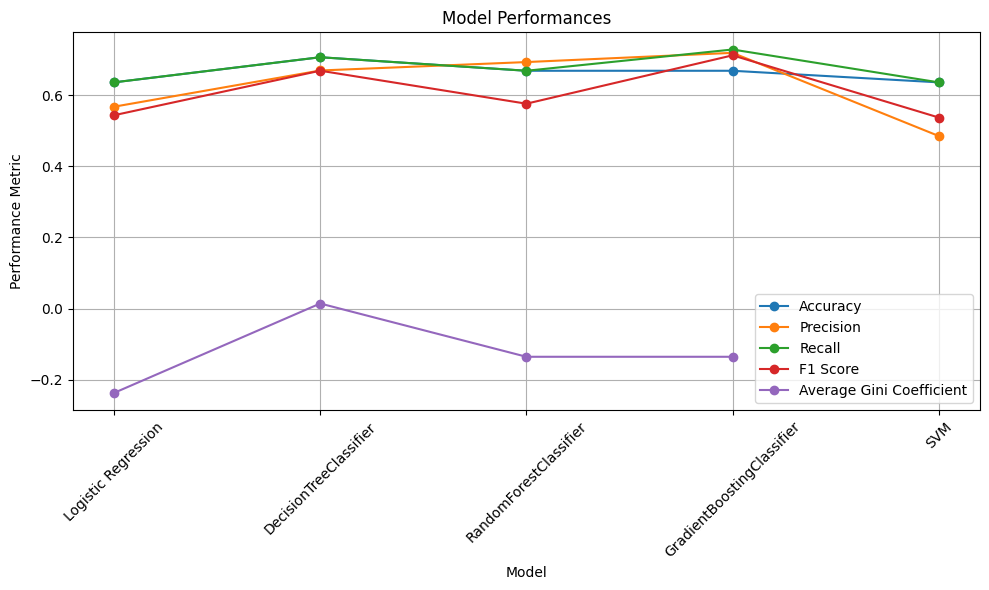

In [ ]:
import matplotlib.pyplot as plt

# Initialize a dictionary to store model performances
model_performance = {}

# Loop through each model's evaluation metrics
for model_name, metrics in evaluation_metrics.items():
    model_performance[model_name] = {
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1 Score': metrics['F1 Score'],
        'Average Gini Coefficient': metrics.get('Average Gini Coefficient', None)
    }

# Extract model names and metrics
models = list(model_performance.keys())
metrics = list(model_performance[models[0]].keys())

# Plot model performances using lines
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric as a separate line
for metric_name in metrics:
    values = [model_performance[model_name][metric_name] for model_name in models]
    ax.plot(models, values, marker='o', label=metric_name)

# Add labels and legend
ax.set_xlabel('Model')
ax.set_ylabel('Performance Metric')
ax.set_title('Model Performances')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()